# Spark SQL

O Spark SQL é usado para acessar dados estruturados com Spark.

#### Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs. 
#### Pacotes adicionais podem ser encontrados aqui: https://spark-packages.org/

## Spark SQL - Spark Session e SQL Context

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [3]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [4]:
# Spark Session - usado para trabalhar com o Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkSQL").getOrCreate()

In [5]:
# Criando o SQL Context para trabalhar com Spark SQL
sqlContext = SQLContext(sc)

In [6]:
# Importando o arquivo e criando um RDD
linhasRDD1 = sc.textFile("data/carros.csv")

In [7]:
linhasRDD1.count()

198

In [8]:
# Removendo a primeira linha - Transformação 1
linhasRDD2 = linhasRDD1.filter(lambda x: "FUELTYPE" not in x)

In [9]:
linhasRDD2.count()

197

In [10]:
# Dividindo o conjunto de dados em colunas - Transformação 2
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [11]:
# Dividindo o conjunto de dados em colunas - Transformação 3
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [12]:
print(linhasRDD4)

PythonRDD[4] at RDD at PythonRDD.scala:53


In [ ]:
?Row

In [13]:
linhasRDD4.collect()

[Row(body='hatchback', hp=69, make='subaru'),
 Row(body='hatchback', hp=48, make='chevrolet'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=60, make='honda'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=70, make='chevrolet'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=58, make='honda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=76, make='honda'),
 Row(body='sedan', hp=70, make='chevrolet'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, mak

In [14]:
# Criando um dataframe a partir do RDD
linhasDF = spSession.createDataFrame(linhasRDD4)

In [15]:
linhasDF.show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [16]:
type(linhasDF)

pyspark.sql.dataframe.DataFrame

In [17]:
# Mesma coisa que: SELECT * FROM linhasDF
linhasDF.select("*").show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [18]:
# Mesma coisa que: SELECT * FROM linhasDF ORDER BY make
linhasDF.orderBy("make").show()

+-----------+---+-----------+
|       body| hp|       make|
+-----------+---+-----------+
|  hatchback|154|alfa-romero|
|convertible|111|alfa-romero|
|convertible|111|alfa-romero|
|      sedan|110|       audi|
|      wagon|110|       audi|
|      sedan|140|       audi|
|      sedan|110|       audi|
|      sedan|115|       audi|
|      sedan|102|       audi|
|      sedan|121|        bmw|
|      sedan|121|        bmw|
|      sedan|182|        bmw|
|      sedan|182|        bmw|
|      sedan|101|        bmw|
|      sedan|182|        bmw|
|      sedan|121|        bmw|
|      sedan|101|        bmw|
|  hatchback| 70|  chevrolet|
|      sedan| 70|  chevrolet|
|  hatchback| 48|  chevrolet|
+-----------+---+-----------+
only showing top 20 rows



In [19]:
# Registrando o dataframe como uma Temp Table
linhasDF.createOrReplaceTempView("linhasTB")

In [20]:
!java -version

java version "1.8.0_261"
Java(TM) SE Runtime Environment (build 1.8.0_261-b12)
Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)


In [21]:
# Executando queries SQL ANSI
spSession.sql("select * from linhasTB where make = 'nissan'").show()

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: The root scratch dir: /tmp/hive on HDFS should be writable. Current permissions are: rw-rw-rw-;'

In [ ]:
# Executando queries SQL ANSI
spSession.sql("select make, body, avg(hp) from linhasTB group by make, body").show()

## Spark SQL e Arquivos CSV

In [22]:
carrosDF = spSession.read.csv("data/carros.csv", header = True)

In [23]:
type(carrosDF)

pyspark.sql.dataframe.DataFrame

In [24]:
carrosDF.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [25]:
# Registrando o dataframe como uma Temp Table
carrosDF.createOrReplaceTempView("carrosTB")

In [27]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'").show()

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient;'

In [26]:
carrosTT = spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'")

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient;'

In [28]:
carrosTT.show()

NameError: name 'carrosTT' is not defined

## Aplicando Machine Learning

In [27]:
# Carregando o arquivo CSV e mantendo o objeto em cache
carros = sc.textFile("data/carros.csv")
carros.cache()

data/carros.csv MapPartitionsRDD[35] at textFile at NativeMethodAccessorImpl.java:0

In [28]:
# Remove a primeira linha (header)
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [29]:
# Importando função row
from pyspark.sql import Row

In [30]:
# Convertendo para um vetor de linhas
def transformToNumeric(inputStr) :
    
    attList = inputStr.split(",")
    
    doors = 1.0 if attList[3] == "two" else 2.0
    
    body = 1.0 if attList[4] == "sedan" else 2.0 
       
    # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [31]:
# Aplicando a função aos dados e persistindo o resultado em memória
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=35.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=60.0, MPG=38.0, RPM=5500.0),
 Row(BODY=1.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=5200.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=70.0, MPG=38.0, RPM=5400.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=31.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=58.0, MPG=49.0, RPM=4800.0),
 Row(BODY=2.0,

In [33]:
# Criando o Dataframe
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+----+-----+----+----+------+
|BODY|DOORS|  HP| MPG|   RPM|
+----+-----+----+----+------+
| 2.0|  1.0|69.0|31.0|4900.0|
| 2.0|  1.0|48.0|47.0|5100.0|
| 2.0|  1.0|68.0|30.0|5000.0|
| 2.0|  1.0|62.0|35.0|4800.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|60.0|38.0|5500.0|
| 1.0|  1.0|69.0|31.0|5200.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|31.0|5000.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  1.0|70.0|38.0|5400.0|
| 2.0|  1.0|62.0|31.0|4800.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  1.0|58.0|49.0|4800.0|
| 2.0|  2.0|62.0|31.0|4800.0|
| 2.0|  1.0|76.0|30.0|6000.0|
| 1.0|  2.0|70.0|38.0|5400.0|
+----+-----+----+----+------+
only showing top 20 rows



In [34]:
# Sumarizando as estatísticas do conjunto de dados
summStats = carrosDf.describe().toPandas()
summStats

,summary,BODY,DOORS,HP,MPG,RPM
0,count,197,197,197,197,197
1,mean,1.532994923857868,1.5685279187817258,103.60406091370558,25.15228426395939,5118.0203045685275
2,stddev,0.5001812579359883,0.49654352778167493,37.639205349518356,6.437862917085915,481.03591405011446
3,min,1.0,1.0,48.0,13.0,4150.0
4,max,2.0,2.0,262.0,49.0,6600.0


In [35]:
# Extraindo as médias
medias = summStats.iloc[1,1:5].values.tolist()
medias

['1.532994923857868',
 '1.5685279187817258',
 '103.60406091370558',
 '25.15228426395939']

In [36]:
# Extraindo o desvio padrão
desvios_padroes = summStats.iloc[2,1:5].values.tolist()
desvios_padroes

['0.5001812579359883',
 '0.49654352778167493',
 '37.639205349518356',
 '6.437862917085915']

In [37]:
# Inserindo a média e o desvio padrão em uma variável do tipo broadcast 
bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [38]:
# Importando a Função Vectors
from pyspark.ml.linalg import Vectors

In [39]:
# Função para normalizar os dados e criar um vetor denso
def centerAndScale(inRow) :
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value

    retArray = []
    
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)

In [40]:
# Aplicando a normalização aos dados
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([0.9337, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -1.4773, 3.3936]),
 DenseVector([0.9337, -1.145, -0.9459, 0.753]),
 DenseVector([0.9337, -1.145, -1.1053, 1.5297]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -1.1585, 1.9956]),
 DenseVector([-1.0656, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.8928, 1.9956]),
 DenseVector([0.9337, -1.145, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -1.2116, 3.7043]),
 DenseVector([0.9337, 0.869, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.7334, 0.753]),
 DenseVector([-1.0656, 0.869, -0.8928, 1.9956]),
 DenseVector([-1.0656, -

In [41]:
# Criando um Spark Dataframe com as features (atributos)
autoRows = csAuto.map(lambda f: Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[-1.0656035495158...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
+--------------------+
only showing top 10 rows



In [42]:
# Importando o algoritmo K-Means para clusterização
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
+--------------------+----------+
only showing top 20 rows



In [43]:
# Plot dos resultados
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [44]:
# Função para leitura dos dados e plotagem
def unstripData(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])


In [45]:
# Organizando os dados para o Plot
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

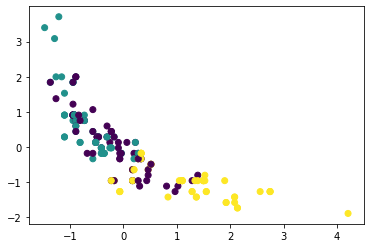

In [46]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])

## Spark SQL e Arquivos JSON

Neste site você pode validar a estrutura de um arquivo JSON: http://jsonlint.com/

In [47]:
# Importando o arquivo JSON
funcDF = spSession.read.json("data/funcionarios.json")

In [48]:
funcDF.show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|  Gilmar Rezende|   5000|   m|
|  2000|   50|  Matias Tavares|   8500|   m|
|  1000|   36|   Paulo Miranda|   9700|   m|
|  1000|   41|Ana Paula Soares|   9500|   f|
|  2000|   34|   Carolina Maia|   6500|   m|
+------+-----+----------------+-------+----+



In [49]:
funcDF.printSchema()

root
 |-- deptid: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- sexo: string (nullable = true)



In [50]:
type(funcDF)

pyspark.sql.dataframe.DataFrame

In [51]:
# Operações com Dataframe Spark SQL - select()
funcDF.select("nome").show()

+----------------+
|            nome|
+----------------+
|  Gilmar Rezende|
|  Matias Tavares|
|   Paulo Miranda|
|Ana Paula Soares|
|   Carolina Maia|
+----------------+



In [52]:
# Operações com Dataframe Spark SQL - filter()
funcDF.filter(funcDF["idade"] == 50).show()

+------+-----+--------------+-------+----+
|deptid|idade|          nome|salario|sexo|
+------+-----+--------------+-------+----+
|  2000|   50|Matias Tavares|   8500|   m|
+------+-----+--------------+-------+----+



In [53]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("sexo").count().show()

+----+-----+
|sexo|count|
+----+-----+
|   m|    4|
|   f|    1|
+----+-----+



In [54]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("deptid").agg({"salario": "avg", "idade": "max"}).show()

+------+----------+-----------------+
|deptid|max(idade)|     avg(salario)|
+------+----------+-----------------+
|  2000|        50|           7500.0|
|  1000|        42|8066.666666666667|
+------+----------+-----------------+



In [55]:
# Registrando o dataframe como uma Temp Table
funcDF.registerTempTable("funcTB")

In [ ]:
# Executando queries SQL ANSI
spSession.sql("select deptid, max(idade), avg(salario) from funcTB group by deptid").show()

## Temp Tables

In [56]:
# Registrando o dataframe como temp Table
funcDF.createOrReplaceTempView("funcTB")

In [57]:
spSession.sql("select * from funcTB where salario = 9700").show()

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient;'

In [60]:
# Criando Temp Table
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")

In [61]:
type(funcTB2)

NameError: name 'funcTB2' is not defined

In [62]:
# Persistindo a Temp Table 
funcTB3 = spSession.table("funcTB2")

AnalysisException: 'java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient;'

In [63]:
type(funcTB3)

NameError: name 'funcTB3' is not defined

In [2]:
# Comparando o Dataframe com a tabela temporária criada
sorted(funcDF.collect()) == sorted(funcTB3.collect())

NameError: name 'funcDF' is not defined

In [3]:
# Aplicando o filtro
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")
funcTB3 = spSession.table("funcTB2")
funcTB3.filter("idade = '42'").first()

NameError: name 'funcDF' is not defined

In [4]:
# Drop Temp Table
sqlContext.dropTempTable("funcTB2")

## Banco de Dados Relacional

Extraindo Dados do MySQL. Primeiro precisamos baixar o driver JDBC. Haverá um driver JDBC para cada banco de dados que você conectar (Oracle, SQL Server, etc...)

1- Download do Driver JDBC para o MySQL: http://dev.mysql.com/downloads/connector/j/

2- Baixar o arquivo .zip

3- Descompactar o arquivo e copiar o arquivo mysql-connector-java-8.0.16.jar para a pasta /opt/Spark/jars ou para SO Windows em C:\Spark\jars

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spSession = SparkSession.builder.master("local").appName("DSA-SparkSQL").getOrCreate()
sqlContext = SQLContext(sc)

In [20]:
mysql_df = spSession.read.format("jdbc").options(
    url = "jdbc:mysql://localhost/carros",
    serverTimezone = "UTC",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "carrosTB",
    user = "root",
    password = "senhamysql123").load()

Py4JJavaError: An error occurred while calling o426.load.
: java.lang.ClassNotFoundException: com.mysql.jdbc.Driver
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at org.apache.spark.sql.execution.datasources.jdbc.DriverRegistry$.register(DriverRegistry.scala:45)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$1(JDBCOptions.scala:99)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$1$adapted(JDBCOptions.scala:99)
	at scala.Option.foreach(Option.scala:274)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:99)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:35)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:32)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:318)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:223)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:167)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [15]:
mysql_df.show()

NameError: name 'mysql_df' is not defined

In [ ]:
mysql_df.registerTempTable("carrostb")

In [ ]:
spSession.sql("select * from carrostb where hp = '68'").show()

## Banco de Dados Não-Relacional

Spark Connector: https://docs.mongodb.com/spark-connector/current/

Mongo Spark: https://spark-packages.org/package/mongodb/mongo-spark

$SPARK_HOME/bin/pyspark --packages org.mongodb.spark:mongo-spark-connector_2.11:2.4.0

In [ ]:
# Imports
from pyspark.sql import SparkSession

### Leitura

In [ ]:
# Cria a sessão
my_spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config("spark.mongodb.input.uri", "mongodb://localhost/test_db.test_collection") \
    .config("spark.mongodb.output.uri", "mongodb://localhost/test_db.test_collection") \
    .getOrCreate()

In [ ]:
# Carrega os dados do MongoDB no Spark
dados = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [ ]:
dados.printSchema()

In [ ]:
dados.count()

In [ ]:
dados.head()

In [ ]:
dados.show()

### Gravação

In [ ]:
registro = spark.createDataFrame([("Camisa T-Shirt",  50)], ["item", "qty"])

In [ ]:
registro.write.format("com.mongodb.spark.sql.DefaultSource").mode("append").save()

In [ ]:
dados.show()